# CNN-LSTM

In [123]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pydot
import graphviz

%matplotlib inline
plt.style.use("ggplot")

In [124]:
#loading dataset

dataset = pd.read_csv('/content/BAC.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,16.450001,16.490000,16.250000,16.430000,14.360278,114888000
1,2016-01-05,16.520000,16.590000,16.230000,16.430000,14.360278,66670000
2,2016-01-06,16.190001,16.290001,16.020000,16.080000,14.054366,102760800
3,2016-01-07,15.730000,15.900000,15.440000,15.500000,13.547432,116255900
4,2016-01-08,15.940000,15.940000,15.160000,15.200000,13.285223,124782400
...,...,...,...,...,...,...,...
1505,2021-12-23,44.680000,45.070000,44.400002,44.419998,43.663036,34053500
1506,2021-12-27,44.549999,44.820000,44.310001,44.639999,43.879288,33879200
1507,2021-12-28,44.470001,45.080002,44.419998,44.700001,43.938267,32492400
1508,2021-12-29,44.849998,45.119999,44.599998,44.630001,43.869461,25294900


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [126]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,27.673662,27.971993,27.377126,27.675510,25.725377,7.100467e+07
std,8.009475,8.067340,7.953708,8.007216,8.166610,3.652733e+07
min,11.460000,11.550000,10.990000,11.160000,9.754154,1.380540e+07
25%,23.379999,23.670000,23.120001,23.389999,21.227960,4.748318e+07
50%,27.960000,28.270000,27.685001,27.920000,25.874834,6.109520e+07
75%,31.187501,31.437501,30.907500,31.197501,28.709208,8.377340e+07
max,48.150002,48.689999,47.610001,48.369999,47.317974,3.750887e+08


In [127]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [128]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,16.450001,16.490000,16.25,16.43,14.360278,114888000
1,2016-01-05,16.520000,16.590000,16.23,16.43,14.360278,66670000
2,2016-01-06,16.190001,16.290001,16.02,16.08,14.054366,102760800
3,2016-01-07,15.730000,15.900000,15.44,15.50,13.547432,116255900
4,2016-01-08,15.940000,15.940000,15.16,15.20,13.285223,124782400


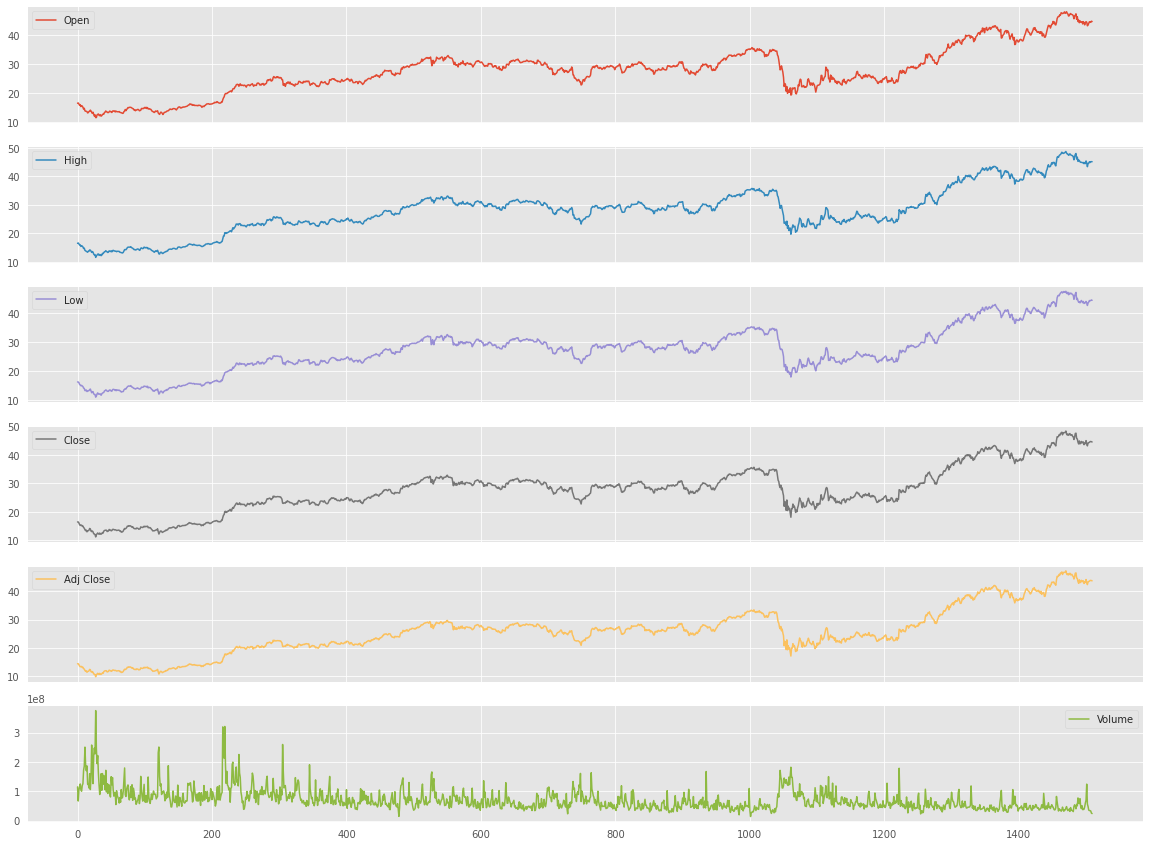

In [129]:
#plotting dataset

dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

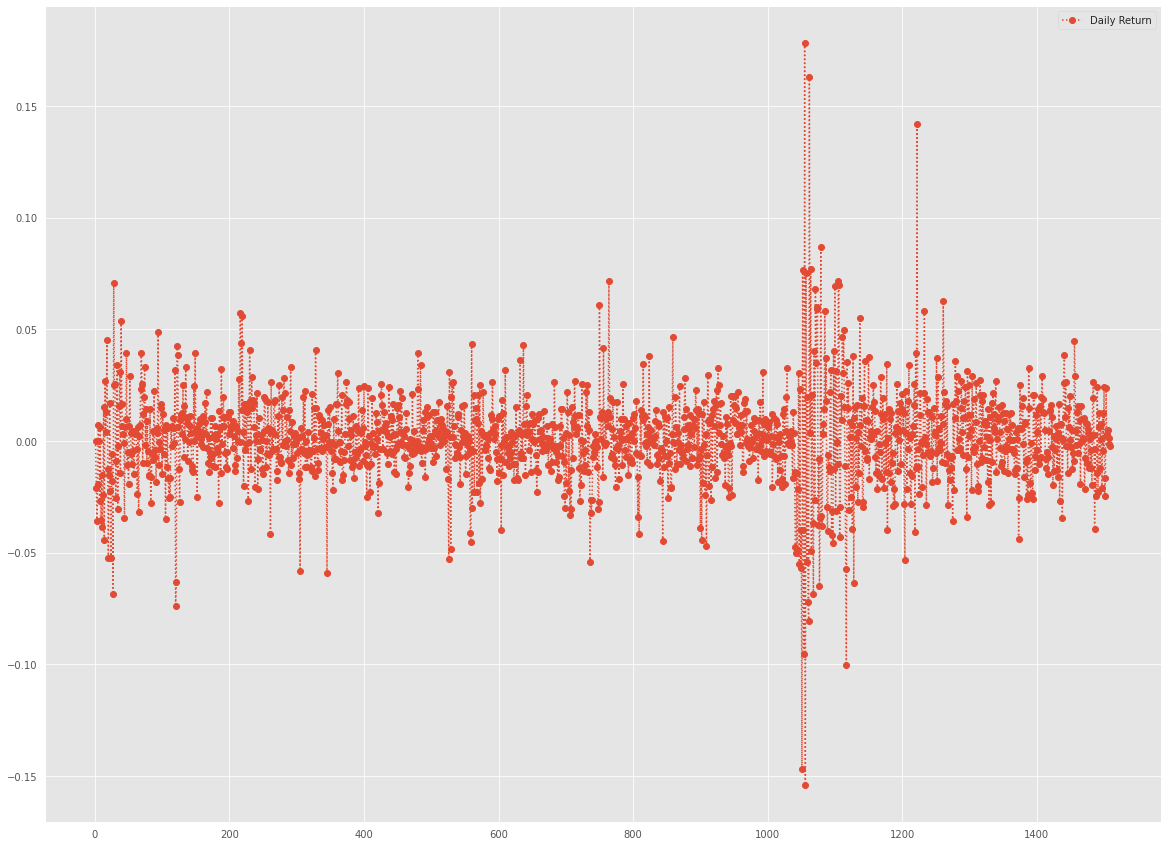

In [130]:
#Adding moving averages to the dataset

m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

# plotting Daily Return

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

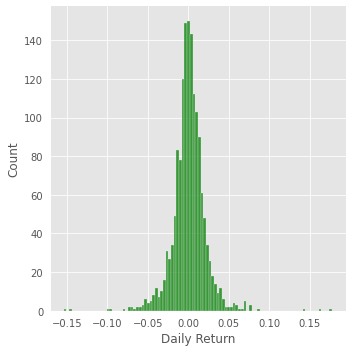

In [131]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [132]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2016-01-04,16.450001,16.490000,16.25,16.43,14.360278,114888000,27.660682,27.614249,27.562411,0.000883
1,2016-01-05,16.520000,16.590000,16.23,16.43,14.360278,66670000,27.660682,27.614249,27.562411,0.000000
2,2016-01-06,16.190001,16.290001,16.02,16.08,14.054366,102760800,27.660682,27.614249,27.562411,-0.021302
3,2016-01-07,15.730000,15.900000,15.44,15.50,13.547432,116255900,27.660682,27.614249,27.562411,-0.036070
4,2016-01-08,15.940000,15.940000,15.16,15.20,13.285223,124782400,27.660682,27.614249,27.562411,-0.019355


In [133]:
dataset.nunique()

Date                  1510
Open                  1093
High                  1084
Low                   1087
Close                 1088
Adj Close             1383
Volume                1510
M_avg for 10 days     1489
M_avg for 50 days     1460
M_avg for 100 days    1410
Daily Return          1480
dtype: int64

In [134]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,14.360278,16.430000,0.000883,2016-01-04,16.490000,16.250000,27.660682,27.562411,27.614249,16.450001,114888000
1,14.360278,16.430000,0.000000,2016-01-05,16.590000,16.230000,27.660682,27.562411,27.614249,16.520000,66670000
2,14.054366,16.080000,-0.021302,2016-01-06,16.290001,16.020000,27.660682,27.562411,27.614249,16.190001,102760800
3,13.547432,15.500000,-0.036070,2016-01-07,15.900000,15.440000,27.660682,27.562411,27.614249,15.730000,116255900
4,13.285223,15.200000,-0.019355,2016-01-08,15.940000,15.160000,27.660682,27.562411,27.614249,15.940000,124782400
...,...,...,...,...,...,...,...,...,...,...,...
1505,43.663036,44.419998,0.003162,2021-12-23,45.070000,44.400002,44.110000,43.766700,45.976200,44.680000,34053500
1506,43.879288,44.639999,0.004953,2021-12-27,44.820000,44.310001,44.122000,43.830400,45.967600,44.549999,33879200
1507,43.938267,44.700001,0.001344,2021-12-28,45.080002,44.419998,44.234000,43.887200,45.934200,44.470001,32492400
1508,43.869461,44.630001,-0.001566,2021-12-29,45.119999,44.599998,44.284000,43.932000,45.901200,44.849998,25294900


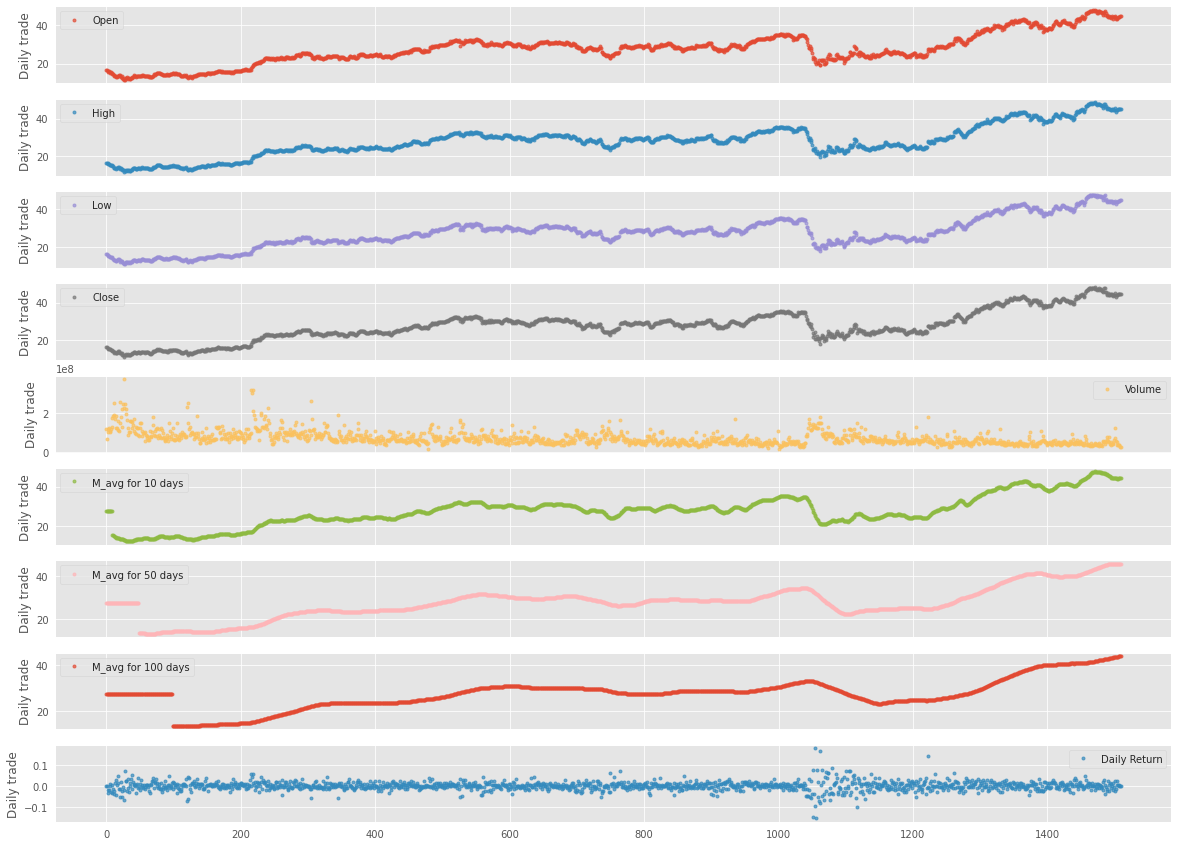

In [135]:
# plotting every column of the dataset

cols_plot = ['Open', 'High', 'Low','Close','Volume','M_avg for 10 days','M_avg for 50 days','M_avg for 100 days','Daily Return']
axes = dataset[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Text(0, 0.5, 'Closing price')

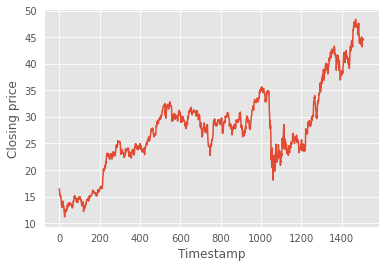

In [136]:
# plotting Close price of the dataset

plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [137]:
df = dataset
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2016-01-04  16.450001  16.490000  16.250000  16.430000  14.360278   
1     2016-01-05  16.520000  16.590000  16.230000  16.430000  14.360278   
2     2016-01-06  16.190001  16.290001  16.020000  16.080000  14.054366   
3     2016-01-07  15.730000  15.900000  15.440000  15.500000  13.547432   
4     2016-01-08  15.940000  15.940000  15.160000  15.200000  13.285223   
...          ...        ...        ...        ...        ...        ...   
1505  2021-12-23  44.680000  45.070000  44.400002  44.419998  43.663036   
1506  2021-12-27  44.549999  44.820000  44.310001  44.639999  43.879288   
1507  2021-12-28  44.470001  45.080002  44.419998  44.700001  43.938267   
1508  2021-12-29  44.849998  45.119999  44.599998  44.630001  43.869461   
1509  2021-12-30  44.750000  45.099998  44.480000  44.529999  43.771164   

         Volume  M_avg for 10 days  M_avg for 50 days  M_avg for 100 days  \
0     114888000       

In [138]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [139]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1510.0,2.767366e+01,8.009475e+00,1.146000e+01,2.338000e+01,2.796000e+01,3.118750e+01,4.815000e+01
High,1510.0,2.797199e+01,8.067340e+00,1.155000e+01,2.367000e+01,2.827000e+01,3.143750e+01,4.869000e+01
Low,1510.0,2.737713e+01,7.953708e+00,1.099000e+01,2.312000e+01,2.768500e+01,3.090750e+01,4.761000e+01
Close,1510.0,2.767551e+01,8.007216e+00,1.116000e+01,2.339000e+01,2.792000e+01,3.119750e+01,4.837000e+01
Adj Close,1510.0,2.572538e+01,8.166610e+00,9.754154e+00,2.122796e+01,2.587483e+01,2.870921e+01,4.731797e+01
Volume,1510.0,7.100467e+07,3.652733e+07,1.380540e+07,4.748318e+07,6.109520e+07,8.377340e+07,3.750887e+08
M_avg for 10 days,1510.0,2.766068e+01,7.899222e+00,1.211000e+01,2.351025e+01,2.785100e+01,3.113150e+01,4.770700e+01
M_avg for 50 days,1510.0,2.761425e+01,7.325002e+00,1.303880e+01,2.396165e+01,2.798320e+01,3.065730e+01,4.597620e+01
M_avg for 100 days,1510.0,2.756241e+01,6.553355e+00,1.365740e+01,2.407537e+01,2.769925e+01,3.014760e+01,4.397060e+01
Daily Return,1510.0,8.830500e-04,2.109378e-02,-1.539735e-01,-8.231618e-03,7.954368e-04,1.077892e-02,1.779620e-01


In [140]:
df_close = df.reset_index()['Close']

In [141]:
df_close

0       16.430000
1       16.430000
2       16.080000
3       15.500000
4       15.200000
          ...    
1505    44.419998
1506    44.639999
1507    44.700001
1508    44.630001
1509    44.529999
Name: Close, Length: 1510, dtype: float64

In [142]:
# scaling close price of the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [143]:
df_close = pd.DataFrame(df_close)

In [144]:
# Dividing training and test data for plotting

training_size = int(len(df_close)*0.75)
test_size = len(df_close)-training_size
train_data,test_data=df_close.iloc[0:training_size,0],df_close.iloc[training_size:,0]

In [145]:
train_data

0       0.141629
1       0.141629
2       0.132223
3       0.116635
4       0.108573
          ...   
1127    0.364418
1128    0.322225
1129    0.328675
1130    0.338350
1131    0.325181
Name: 0, Length: 1132, dtype: float64

In [146]:
test_data

1132    0.325988
1133    0.335931
1134    0.318463
1135    0.320881
1136    0.312013
          ...   
1505    0.893846
1506    0.899758
1507    0.901371
1508    0.899489
1509    0.896802
Name: 0, Length: 378, dtype: float64

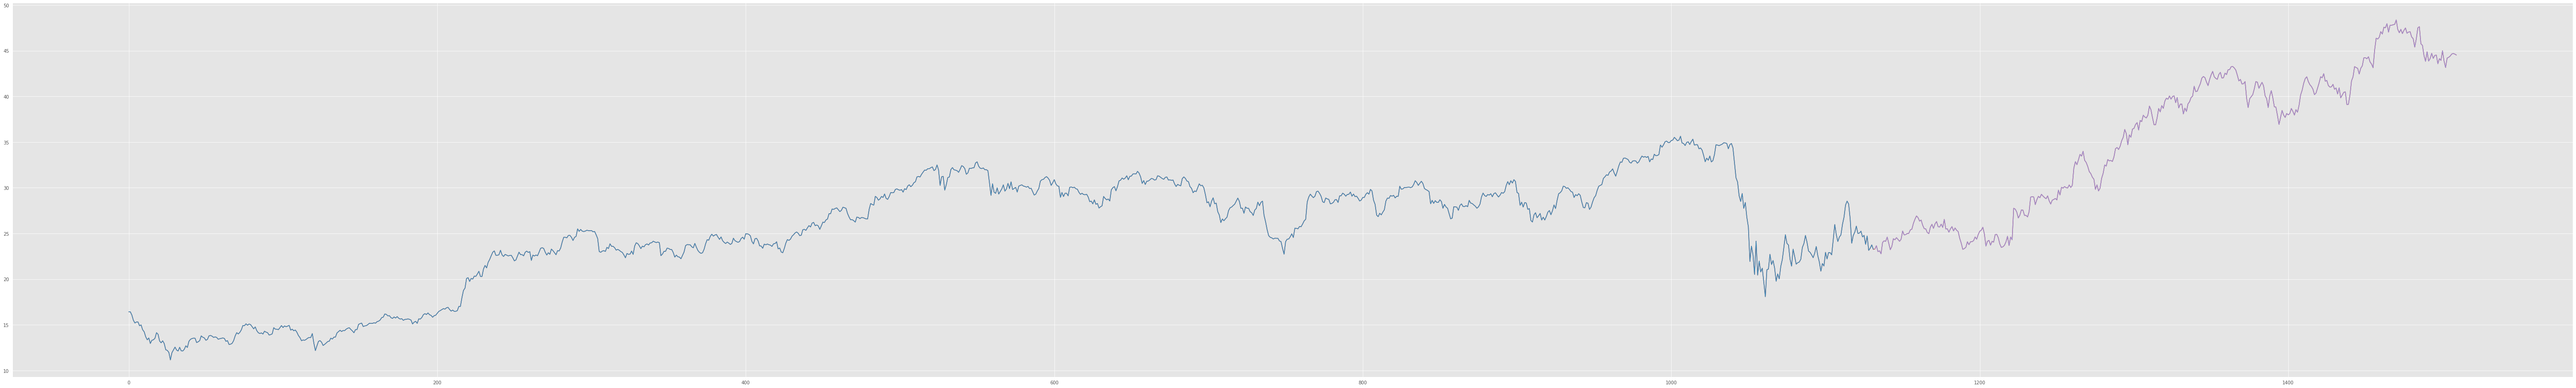

In [147]:
# Plotting training data,test data, and close price of the dataset 
train_dataPlot = np.empty_like(df_close)
train_dataPlot[:, :] = np.nan
train_dataPlot[0:len(train_data),0] = train_data

test_dataPlot = np.empty_like(df_close)
test_dataPlot[:, :] = np.nan
test_dataPlot[len(train_data):len(df_close),0] = test_data

plt.figure(figsize=(100,15))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(scaler.inverse_transform(train_dataPlot))
plt.plot(scaler.inverse_transform(test_dataPlot))

plt.show()

In [148]:
#preparing data in time series format with the help of time step

X = []
Y = []
time_step=100
for i in range(1 , len(df_close) - time_step -1 , 1):
    temp = []
    temp2 = []
    for j in range(time_step):
        temp.append(df_close.iloc[i + j, 0])
    temp2.append(df_close.iloc[i + time_step, 0])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

In [149]:
#splitting data into train and test for prediction

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

In [150]:
#reshaping data

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [151]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [152]:
# model layers including CNN and LSTM

cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [153]:
#compiling and training the model

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
29/29 [==============================] - 14s 119ms/step - loss: 0.0696 - mse: 0.0696 - mae: 0.1985 - val_loss: 0.0118 - val_mse: 0.0118 - val_mae: 0.0883
Epoch 2/40
29/29 [==============================] - 1s 49ms/step - loss: 0.0145 - mse: 0.0145 - mae: 0.0919 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0687
Epoch 3/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0800 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0709
Epoch 4/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0831 - val_loss: 0.0065 - val_mse: 0.0065 - val_mae: 0.0605
Epoch 5/40
29/29 [==============================] - 1s 51ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0749 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0541
Epoch 6/40
29/29 [==============================] - 1s 50ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0688 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0489
Epoch 7/40
29/29 [==

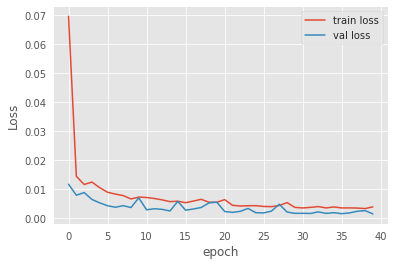

In [154]:
#plotting training and validation loss

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

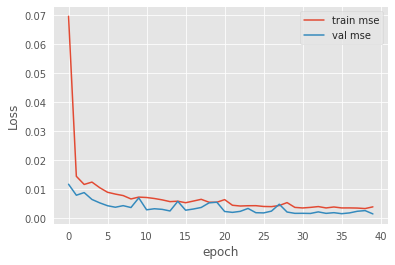

In [155]:
#plotting training and validation MSE

plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


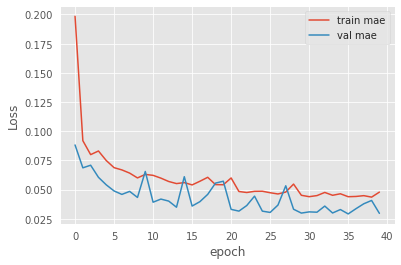

In [156]:
#plotting training and validation MAE

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [157]:
#summary of the CNN-LSTM model

from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_21 (TimeDi  (None, 1, 98, 64)        256       
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, 1, 49, 64)        0         
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 1, 47, 128)       24704     
 stributed)                                                      
                                                                 
 time_distributed_24 (TimeDi  (None, 1, 23, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, 1, 21, 128)      

In [158]:
# evaluating the model

cnn_lstm_model.evaluate(test_X, test_Y)

9/9 [==============================] - 0s 14ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0297


[0.0015607149107381701, 0.0015607149107381701, 0.029670337215065956]

In [159]:
# calculating variance, R2 score and Max error of the model

from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.960264
R2 Score: 0.960264
Max Error: 0.203286


9/9 [==============================] - 0s 14ms/step


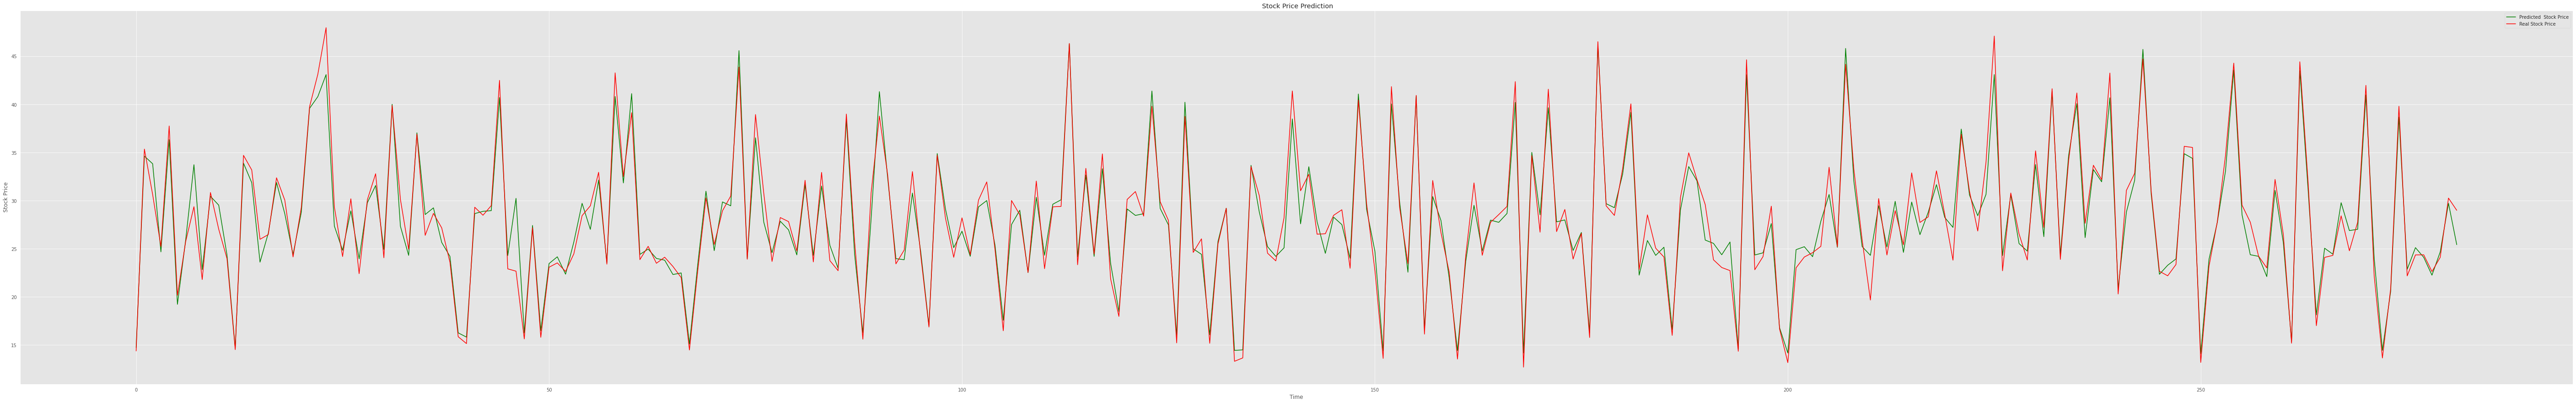

In [160]:
# plotting predicted value and test label

from pylab import rcParams
rcParams['figure.figsize'] = [100,15]

predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
plt.plot(scaler.inverse_transform(predicted), color = 'green', label = 'Predicted  Stock Price')
plt.plot(scaler.inverse_transform(test_label), color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [161]:
scaler.inverse_transform(predicted)

array([[14.728779],
       [34.618404],
       [33.826366],
       [24.673714],
       [36.325943],
       [19.226933],
       [25.916811],
       [33.728577],
       [22.831738],
       [30.44458 ],
       [29.527927],
       [24.369013],
       [14.652414],
       [33.884323],
       [31.86128 ],
       [23.6074  ],
       [26.612562],
       [31.88055 ],
       [28.635778],
       [24.40009 ],
       [28.773325],
       [39.580402],
       [40.79778 ],
       [43.088093],
       [27.362206],
       [24.838621],
       [28.942106],
       [23.945866],
       [29.782253],
       [31.568916],
       [24.913296],
       [40.003124],
       [27.336527],
       [24.30992 ],
       [37.04168 ],
       [28.553408],
       [29.24747 ],
       [25.658901],
       [24.206606],
       [16.262653],
       [15.821624],
       [28.651175],
       [28.88509 ],
       [28.956512],
       [40.710052],
       [24.29142 ],
       [30.234283],
       [16.239628],
       [27.421394],
       [16.494287],


In [162]:
scaler.inverse_transform(test_label)

array([[14.38    ],
       [35.349998],
       [30.629999],
       [25.23    ],
       [37.75    ],
       [20.16    ],
       [25.75    ],
       [29.370001],
       [21.799999],
       [30.84    ],
       [27.030001],
       [23.98    ],
       [14.52    ],
       [34.700001],
       [33.18    ],
       [25.98    ],
       [26.469999],
       [32.369999],
       [30.049999],
       [24.15    ],
       [29.290001],
       [39.75    ],
       [43.119999],
       [47.959999],
       [29.35    ],
       [24.190001],
       [30.190001],
       [22.41    ],
       [30.09    ],
       [32.790001],
       [24.059999],
       [39.880001],
       [30.129999],
       [24.950001],
       [36.900002],
       [26.389999],
       [28.67    ],
       [27.17    ],
       [23.59    ],
       [15.86    ],
       [15.15    ],
       [29.309999],
       [28.48    ],
       [29.48    ],
       [42.490002],
       [22.91    ],
       [22.67    ],
       [15.63    ],
       [27.18    ],
       [15.8     ],
